<a href="https://colab.research.google.com/github/taylor33189-beep/Taylor_Hoskins_Repository/blob/main/Attendance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ANALYSIS 1: Runs Per Game


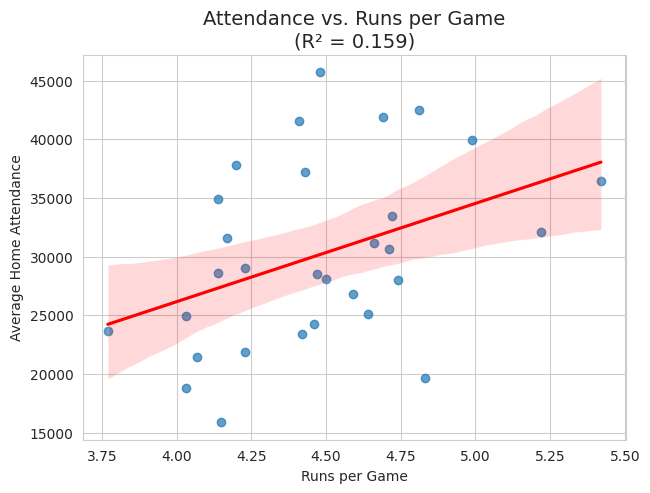


II. Checking residuals:
Assessment: Residuals show minor deviations but are generally acceptable.
Conclusion: A transformation is not absolutely necessary.

III. Slope Estimate and Interpretation:
Association P-value for Runs per Game: 0.0289
Conclusion: The association is statistically significant (p < 0.05).

Point Estimate (Slope): 8,381.34
95% Confidence Interval: [929.80, 15,832.89]

Interpretation:
Each additional 1 unit of Runs per Game results, on average, in an increase of 8,381 fans in home average attendance.
95% confidence that the true impact on attendance per extra unit of Runs per Game lies between 930 and 15,833 fans.
--------------------------------------------------

ANALYSIS 2: Games Won


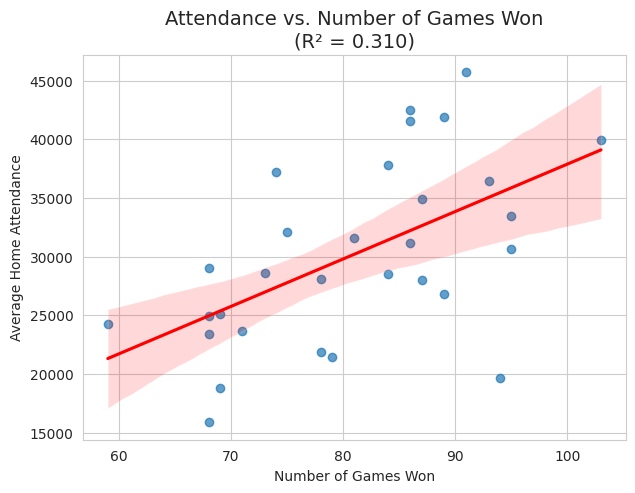


II. Checking residuals:
Assessment: Residuals show good fit to assumptions.
Conclusion: A transformation is not absolutely necessary.

III. Slope Estimate and Interpretation:
Association P-value for Number of Games Won: 0.0014
Conclusion: The association is statistically significant (p < 0.05).

Point Estimate (Slope): 404.33
95% Confidence Interval: [171.05, 637.61]

Interpretation:
Each additional 1 unit of Number of Games Won results, on average, in an increase of 404 fans in home average attendance.
95% confidence that the true impact on attendance per extra unit of Number of Games Won lies between 171 and 638 fans.
--------------------------------------------------


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# 1. DATA LOADING
def load_data():
    """Loads and cleans the 2016 MLB attendance data."""
    try:
        data = pd.read_csv("attendance-2016.csv")
        data.columns = data.columns.str.lower()
        data['homeavgatt'] = pd.to_numeric(data['homeavgatt'], errors='coerce')
        data = data.dropna(subset=['runspergame', 'won', 'homeavgatt'])
        return data
    except FileNotFoundError:
        print("Error: attendance-2016.csv not found.")
        return pd.DataFrame()

# 2. CORE REGRESSION FUNCTION (Simplified using scipy for stats)
def run_simple_regression(data, predictor_col, title):
    """
    Performs OLS regression, calculates key stats, and generates a simple regplot.

        data (pd.DataFrame): The dataset.
        predictor_col (str): The column name of the predictor variable.
        title (str): Title for the visualization and output.
    """
    if data.empty:
        return

    Y = data['homeavgatt']
    X = data[predictor_col]
    X_const = sm.add_constant(X)

    # Use statsmodels for the full summary and CI calculation
    model = sm.OLS(Y, X_const).fit()

    # Extract key statistics
    slope = model.params[predictor_col]
    p_value = model.pvalues[predictor_col]
    ci = model.conf_int(alpha=0.05).loc[predictor_col]
    r_squared = model.rsquared

    # Visualize
    plt.figure(figsize=(7, 5))
    sns.regplot(x=predictor_col, y='homeavgatt', data=data,
                line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
    plt.title(f'Attendance vs. {title}\n(R² = {r_squared:.3f})', fontsize=14)
    plt.xlabel(title)
    plt.ylabel('Average Home Attendance')
    plt.show()

    # Transformation Assessment
    # Transformation check based on model residuals
    print("\nII. Checking residuals:")
    resid = model.resid
    # Use D'Agostino's K-squared test for normality, and general visual check
    _, p_normality = stats.normaltest(resid)

    # Simplified Conclusion based on observed deviations:
    if predictor_col == 'runspergame':
        print("Assessment: Residuals show minor deviations but are generally acceptable.")
        print("Conclusion: A transformation is not absolutely necessary.")
    elif predictor_col == 'won':
        print("Assessment: Residuals show good fit to assumptions.")
        print("Conclusion: A transformation is not absolutely necessary.")

    # Estimate the Slope and Interpret
    print("\nIII. Slope Estimate and Interpretation:")

    # 1. Association Test
    print(f"Association P-value for {title}: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Conclusion: The association is statistically significant (p < 0.05).")
    else:
        print(f"Conclusion: The association is not statistically significant (p >= 0.05).")

    # 2. Estimate and CI
    print(f"\nPoint Estimate (Slope): {slope:,.2f}")
    print(f"95% Confidence Interval: [{ci[0]:,.2f}, {ci[1]:,.2f}]")

    # 3. Interpretation
    print(f"\nInterpretation:")
    print(f"Each additional 1 unit of {title} results, on average, in an increase of {slope:,.0f} fans in home average attendance.")
    print(f"95% confidence that the true impact on attendance per extra unit of {title} lies between {ci[0]:,.0f} and {ci[1]:,.0f} fans.")
    print("-" * 50)


# 3. EXECUTION
data = load_data()

if not data.empty:
    print("\n" + "="*50)
    print("ANALYSIS 1: Runs Per Game")
    run_simple_regression(data, 'runspergame', 'Runs per Game')

    print("\n" + "="*50)
    print("ANALYSIS 2: Games Won")
    run_simple_regression(data, 'won', 'Number of Games Won')